In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

# Load data
csv_features = "./Dataset/acsincome_ca_features.csv"
csv_labels = "./Dataset/acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.05
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

On ne standardize que les sets de feature, les labels (Y) correspondant à des booléens n'ont pas besoin d'être standardisés.

# Random Forest

In [8]:
RF_def = RandomForestClassifier()

RF_def.fit(X_train, Y_train)
print("Model score on test dataset :  ", RF_def.score(X_test, Y_test))
# print("Model score on train dataset : ", RF_def.score(X_train, Y_train))

Model score on test dataset :   0.803270311701584


Model score on train dataset : 1.0

Default model score with 1% : 0.7577

with 10% : 0.7994
 
with 20% : 0.7994

with 50% : 0.8105

In [11]:
score = cross_val_score(RF_def, X_train, Y_train, cv=5).mean()
print(f"Score moyen obtenu par cross validation du modèle avec les paramètres défauts : {score:.4f}")


Score moyen obtenu par cross validation du modèle avec les paramètres défauts : 0.7977


## 1. Recherche de paramètres : 

Paramètres défaut : param_def ={
    
    n_estimators : 100,

    max_depth : None,

    min_samples_split : 2,
    
    min_samples_leaf : 1
} 

### n_estimators

Score pour le paramètre n_estimators 50 :  0.8011755393158941
Score pour le paramètre n_estimators 100 :  0.8019423124788332
Score pour le paramètre n_estimators 200 :  0.8025813717209553
Score pour le paramètre n_estimators 300 :  0.8016869662435377
Score pour le paramètre n_estimators 400 :  0.7992592592592592
Score pour le paramètre n_estimators 500 :  0.8006647652389637


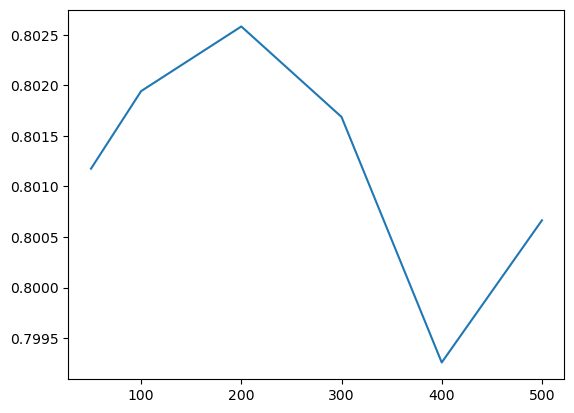

In [3]:
val_score = []
tab = [50, 100, 200, 300, 400, 500]
for n in tab:
    score = cross_val_score(RandomForestClassifier(n_estimators=n), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre n_estimators", n, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

optimal autour de 200

### criterion

Score pour le paramètre criterion gini :  0.8015592523227204
Score pour le paramètre criterion entropy :  0.7992590960465809
Score pour le paramètre criterion log_loss :  0.7959371467975631


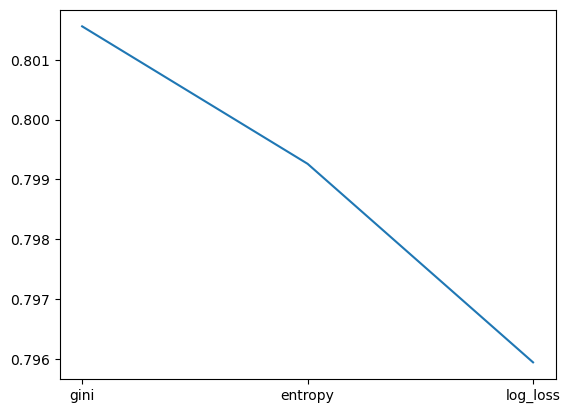

In [6]:
val_score = []
tab =['gini', 'entropy', 'log_loss'] 
for c in tab:
    score = cross_val_score(RandomForestClassifier(criterion=c), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre criterion", c, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

une fois sur deux meilleur gini, une fois log loss => peu d'écart

### max_depth

Score pour le paramètre max_depth None :  0.8016869662435377
Score pour le paramètre max_depth 3 :  0.7804755201384044
Score pour le paramètre max_depth 8 :  0.8065422169994164
Score pour le paramètre max_depth 10 :  0.8078198458456253
Score pour le paramètre max_depth 12 :  0.8041145916214771
Score pour le paramètre max_depth 50 :  0.8006650916643204
Score pour le paramètre max_depth 100 :  0.8009206827186336


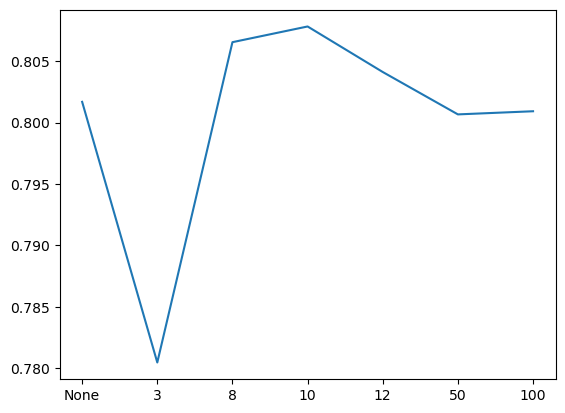

In [7]:
val_score = []
tab =[None, 3, 8, 10, 12, 50, 100] 
for m in tab:
    score = cross_val_score(RandomForestClassifier(max_depth=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre max_depth", m, ": ",score)
    val_score.append(score)

tab =['None', 3, 8, 10, 12, 50, 100] 
plt.plot(tab,val_score)

Intéressant autour de 10.

### min_samples_split

Score pour le paramètre min_samples_split 2 :  0.8001536647366768
Score pour le paramètre min_samples_split 10 :  0.8067974000220339
Score pour le paramètre min_samples_split 20 :  0.8071811130288602
Score pour le paramètre min_samples_split 28 :  0.8079478045854602
Score pour le paramètre min_samples_split 30 :  0.8085865374022255
Score pour le paramètre min_samples_split 32 :  0.8076916422867729
Score pour le paramètre min_samples_split 50 :  0.8060311981034687
Score pour le paramètre min_samples_split 100 :  0.8053920572550075
Score pour le paramètre min_samples_split 200 :  0.7993864835420414
Score pour le paramètre min_samples_split 500 :  0.7944032740463279


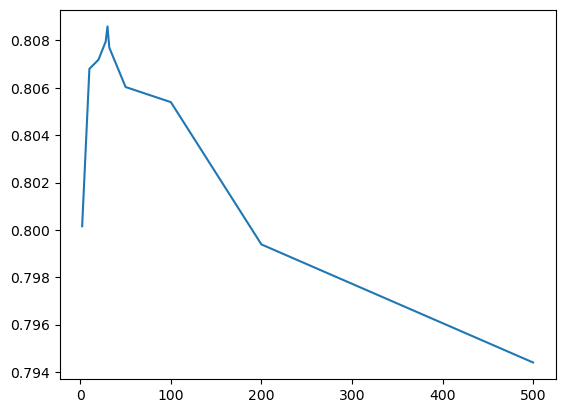

In [8]:
val_score = []
tab = [2, 10, 20, 28, 30, 32, 50, 100, 200, 500]
for m in tab :
    score = cross_val_score(RandomForestClassifier(min_samples_split=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre min_samples_split", m, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Max autour de 30

### min_samples_leaf

Score pour le paramètre min_samples_leaf 1 :  0.801431048763868
Score pour le paramètre min_samples_leaf 2 :  0.8036032463001727
Score pour le paramètre min_samples_leaf 3 :  0.8061587488116077
Score pour le paramètre min_samples_leaf 4 :  0.8047528348002073
Score pour le paramètre min_samples_leaf 5 :  0.806797481628373
Score pour le paramètre min_samples_leaf 6 :  0.805009160311573
Score pour le paramètre min_samples_leaf 7 :  0.8083311911669299
Score pour le paramètre min_samples_leaf 10 :  0.8101195124837297
Score pour le paramètre min_samples_leaf 20 :  0.8078196010266078
Score pour le paramètre min_samples_leaf 30 :  0.8051363845943552


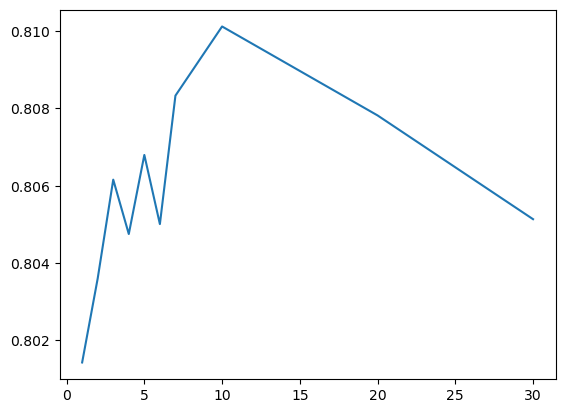

In [10]:
val_score = []
tab = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30]
for m in tab :
    score = cross_val_score(RandomForestClassifier(min_samples_leaf=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre min_samples_leaf", m, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Max : 7, 10

### max_features

Score pour le paramètre max_features sqrt :  0.8002816234765117
Score pour le paramètre max_features log2 :  0.7987479955442939
Score pour le paramètre max_features None :  0.7929977680666234
Score pour le paramètre max_features 1 :  0.7974710195487986
Score pour le paramètre max_features 10 :  0.7942759681572064
Score pour le paramètre max_features 20 :  0.7945315592115196
Score pour le paramètre max_features 30 :  0.7970866536912586


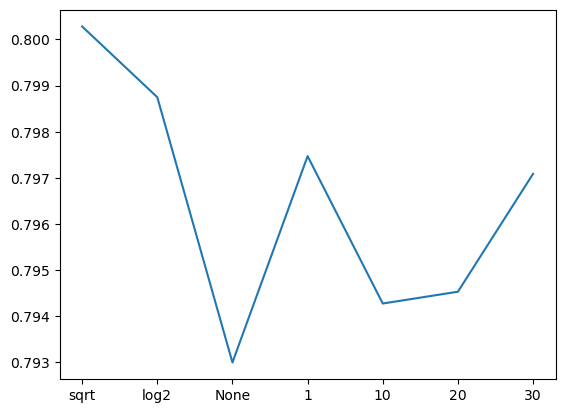

In [12]:
val_score = []
tab = ['sqrt', 'log2', None, 1, 10, 20, 30]
for m in tab :
    score = cross_val_score(RandomForestClassifier(max_features=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre max_features", m, ": ",score)
    val_score.append(score)

tab =['sqrt', 'log2', 'None', 1, 10, 20, 30] 
plt.plot(tab, val_score)

sqrt meilleur

## 2. Evaluation de la qualité du modèle avec les paramètres choisis

In [6]:
RF_model = RandomForestClassifier(n_estimators=200, criterion='log_loss', max_depth=10, min_samples_split=30,
                                  min_samples_leaf=6, max_features='sqrt')
RF_model.fit(X_train, Y_train)
print("modele entrainé")

modele entrainé


### Validation croisée

In [12]:
score = cross_val_score(RF_model, X_train, Y_train, cv=5).mean()
print(f"Score moyen obtenu par cross validation du modèle avec les paramètres sélectionnés : {score:.4f}")

Score moyen obtenu par cross validation du modèle avec les paramètres défauts : 0.8077


### Accuracy

In [33]:
predictions = RF_model.predict(X_test)

res = pd.Series(predictions)
res.value_counts()

False    1178
True      779
Name: count, dtype: int64

In [34]:
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.8022


### Classification report

In [35]:
report = classification_report(Y_test, predictions)
print('Classification Report y_test et predictions pour Random Forest :\n', report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.83      0.84      0.83      1165
        True       0.76      0.75      0.75       792

    accuracy                           0.80      1957
   macro avg       0.80      0.79      0.79      1957
weighted avg       0.80      0.80      0.80      1957



### Confusion Matrix

In [36]:
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix Y_test et predictions pour Random Forest :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[978 187]
 [200 592]]


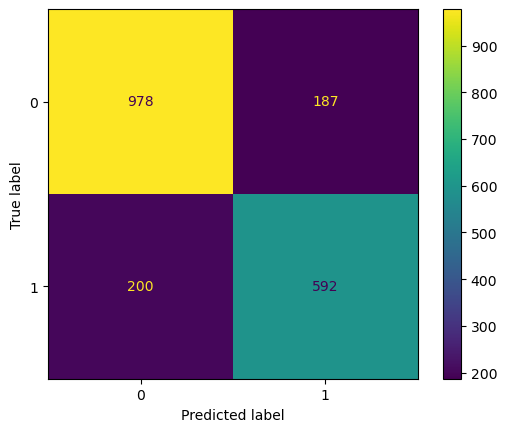

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 3. Gridsearch

4 min pour 1% du dataset

In [40]:
param_grid ={
    'n_estimators' :[100, 150, 200, 250],
    'criterion' : ['gini', 'log_loss'],
    'max_depth' : [8, 10, 12],
    'min_samples_split' :[28, 30, 32],
    'min_samples_leaf' :[4, 5, 6]   
} 
grid= GridSearchCV(estimator= RandomForestClassifier(random_state=0),
                   param_grid=param_grid, scoring='accuracy', cv=5)

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [8, 10, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [28, 30, 32],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

In [41]:
print("best score : ",grid.best_score_)

print("best parameters : ", grid.best_params_)

best score :  0.8024002621446711
best parameters :  {'criterion': 'log_loss', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 32, 'n_estimators': 100}


In [42]:
Best_RF = grid.best_estimator_

In [43]:
Best_RF.score(X_test, Y_test)

0.7729591836734694

## 4. Evaluation de la qualité du modèle avec les meilleurs hyperparamètres

### Validation croisée

validation croisée avec les meilleurs paramètres gridsearch calculés sur 1% du trainset et utilisés sur 5% du dataset

In [14]:
score = cross_val_score(RandomForestClassifier(criterion='log_loss', max_depth=12, min_samples_leaf=4, min_samples_split=32, n_estimators=100), X_train, Y_train, cv=5).mean()
print(f"Score moyen obtenu par cross validation du modèle avec les hyperparamètres Gridsearch : {score:.4f}")


Score moyen obtenu par cross validation du modèle avec les hyperparamètres Gridsearch : 0.8067


### Accuracy

In [44]:
Best_predictions = Best_RF.predict(X_test)

Best_res = pd.Series(Best_predictions)
Best_res.value_counts()

False    252
True     140
Name: count, dtype: int64

In [45]:
Best_accuracy = accuracy_score(Y_test, Best_predictions)
print(f'Accuracy : {Best_accuracy:.4f}')

Accuracy : 0.7730


### Classification report

In [46]:
Best_report = classification_report(Y_test, Best_predictions)
print('Classification Report y_test et predictions pour Random Forest :\n', Best_report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.75      0.88      0.81       217
        True       0.81      0.65      0.72       175

    accuracy                           0.77       392
   macro avg       0.78      0.76      0.76       392
weighted avg       0.78      0.77      0.77       392



### Confusion Matrix

In [47]:
conf_matrix = confusion_matrix(Y_test, Best_predictions)
print('Confusion Matrix Y_test et predictions pour Random Forest :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[190  27]
 [ 62 113]]


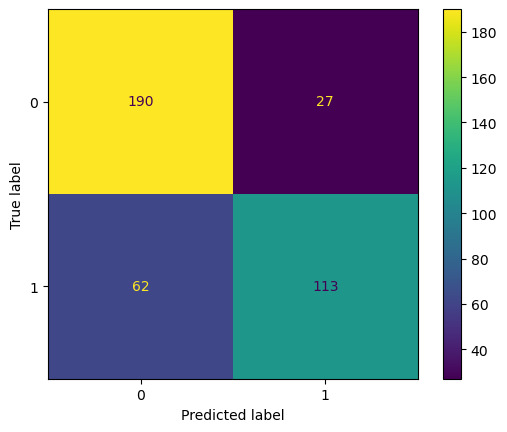

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Projection sur les données du Nevada et du Colorado

## 1. Nevada

In [4]:
# Load data
csv_featuresNE = "./Dataset/acsincome_ne_allfeaturesTP2.csv"
csv_labelsNE = "./Dataset/acsincome_ne_labelTP2.csv"
featuresNE = pd.read_csv(csv_featuresNE)
labelsNE = pd.read_csv(csv_labelsNE)

# Separating features and labels, shuffling
Xne_all = featuresNE
Yne_all = labelsNE
Xne_all,Yne_all = shuffle(Xne_all,Yne_all, random_state=0)

# Only use first N samples to limit training time
sample = 1
num_samples = int(len(Xne_all)*sample)
Xne,Yne = Xne_all[:num_samples], Yne_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
Xne_train, Xne_test, Yne_train, Yne_test = train_test_split(Xne,Yne, random_state=0, train_size=0.8)
Xne_train = scaler.fit_transform(Xne_train) 
Xne_test = scaler.fit_transform(Xne_test)

Pas de réentrainement des modèles, on récupère le modèle entraîné (**SVM_model**) avec les données de Californie pour appliquer le modèle aux données du Nevada et voir si cela peut permettre d'avoir de bons résultats de prédictions.

In [5]:
print("taille du dataset pour le Nevada : ", featuresNE.shape)

print("Répartition des résultats au Nevada : ", labelsNE.value_counts())

taille du dataset pour le Nevada :  (10785, 10)
Répartition des résultats au Nevada :  PINCP
0        7417
1        3368
Name: count, dtype: int64


On travaille sur 100% des données disponibles pour le Nevada car le dataset est sensiblement plus petit.

### Accuracy

In [6]:
predictionsNE = RF_model.predict(Xne_test)

res = pd.Series(predictionsNE)
res.value_counts()

False    1201
True      956
Name: count, dtype: int64

In [7]:
accuracy = accuracy_score(Yne_test, predictionsNE)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7543


### Classification report

In [8]:
report = classification_report(Yne_test, predictionsNE)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1465
           1       0.58      0.81      0.68       692

    accuracy                           0.75      2157
   macro avg       0.74      0.77      0.74      2157
weighted avg       0.79      0.75      0.76      2157



### Confusion Matrix

In [9]:
conf_matrix = confusion_matrix(Yne_test, predictionsNE)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[1068  397]
 [ 133  559]]


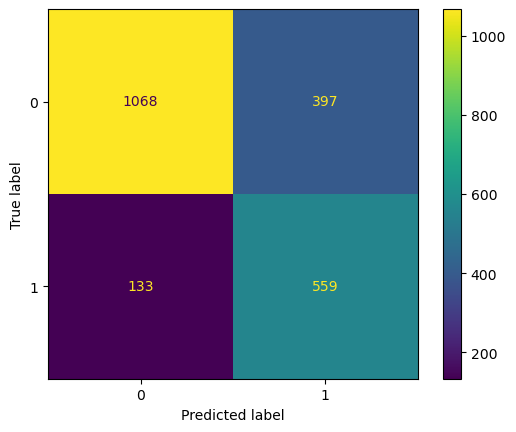

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 2. Colorado

In [11]:
# Load data
csv_featuresCO = "./Dataset/acsincome_co_allfeaturesTP2.csv"
csv_labelsCO = "./Dataset/acsincome_co_labelTP2.csv"
featuresCO = pd.read_csv(csv_featuresCO)
labelsCO = pd.read_csv(csv_labelsCO)

# Separating features and labels, shuffling
Xco_all = featuresCO
Yco_all = labelsCO
Xco_all,Yco_all = shuffle(Xco_all,Yco_all, random_state=0)

# Only use first N samples to limit training time
sample = 1
num_samples = int(len(Xco_all)*sample)
Xco,Yco = Xco_all[:num_samples], Yco_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
Xco_train, Xco_test, Yco_train, Yco_test = train_test_split(Xco,Yco, random_state=0, train_size=0.8)
Xco_train = scaler.fit_transform(Xco_train) 
Xco_test = scaler.fit_transform(Xco_test)

Pas de réentrainement des modèles, on récupère le modèle entraîné (**SVM_model**) avec les données de Californie pour appliquer le modèle aux données du Colorado et voir si cela peut permettre d'avoir de bons résultats de prédictions.

In [12]:
print("taille du dataset pour le Nevada : ", featuresCO.shape)

print("Répartition des résultats au Nevada : ", labelsCO.value_counts())

taille du dataset pour le Nevada :  (31306, 10)
Répartition des résultats au Nevada :  PINCP
0        18334
1        12972
Name: count, dtype: int64


On travaille sur 100% des données disponibles pour le Colorado car le dataset est sensiblement plus petit.

### Accuracy

In [13]:
predictionsCO = RF_model.predict(Xco_test)

res = pd.Series(predictionsCO)
res.value_counts()

False    3537
True     2725
Name: count, dtype: int64

In [14]:
accuracy = accuracy_score(Yco_test, predictionsCO)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7822


### Classification report

In [15]:
report = classification_report(Yco_test, predictionsCO)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      3719
           1       0.72      0.77      0.74      2543

    accuracy                           0.78      6262
   macro avg       0.77      0.78      0.78      6262
weighted avg       0.79      0.78      0.78      6262



### Confusion Matrix

In [16]:
conf_matrix = confusion_matrix(Yco_test, predictionsCO)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[2946  773]
 [ 591 1952]]


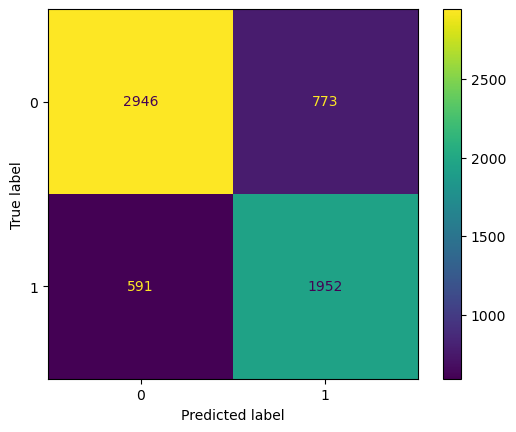

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()